In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

In [2]:
df=pd.read_csv("bhp.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [3]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [27]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [28]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
7012,other,1 BHK,650.0,1.0,500.0,1,76923
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150
5343,other,9 BHK,42000.0,8.0,175.0,9,416
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
1005,other,1 BHK,15.0,1.0,30.0,1,200000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000


In [29]:

df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape


(13172, 7)

In [30]:

df.shape

(13200, 7)

In [31]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(np.float64(23227.73653589432), np.float64(-9900.429065502582))

In [34]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
4350,other,5 Bedroom,1750.0,5.0,450.0,5,25714
9711,Rajaji Nagar,2 Bedroom,1056.0,1.0,250.0,2,23674
1281,Chamrajpet,9 Bedroom,4050.0,7.0,1200.0,9,29629
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
12393,Electronic City Phase II,1 BHK,1200.0,1.0,295.0,1,24583
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
12636,OMBR Layout,5 Bedroom,600.0,3.0,140.0,5,23333
10465,Electronic City,4 Bedroom,1800.0,3.0,700.0,4,38888
8595,other,3 Bedroom,1200.0,2.0,300.0,3,25000


In [35]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [36]:
df2.shape[0]-df3.shape[0]


125

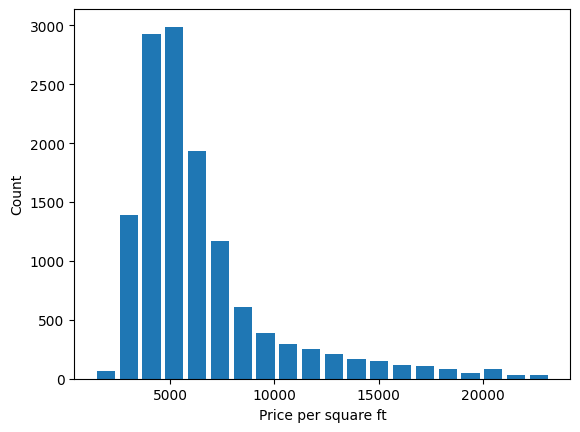

In [38]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

In [ ]:
df["zscore"]=(df.height-df.height.mean())/df.height.std()

In [ ]:
df.head()

In [ ]:
df[df.zscore>3] #do the same for it 